## Naive Bayes Classifier


### 1) Get the dataset

In [5]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the libraries
import numpy as np
import pandas as pd

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True) #Otherwise prints in scientific format

%matplotlib inline 
#Needed to inline graphs
import matplotlib.pyplot as plt


# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
print("No. of datapoints : ", len(dataset))
dataset[:10]

No. of datapoints :  400


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


### 2) Separate the dep and indep variables into a numpy array

We are only going to consider **age** and **salary** as independent variables to predict purchases.

In [6]:
X = dataset.iloc[:,[2,3]].values 
y = dataset.iloc[:, 4].values

### 3) Splitting into training and test set

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### 4) Feature scaling

Is feature scaling needed for this algorithm? 

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_trainS = sc.fit_transform(X_train)
X_testS = sc.transform(X_test)

### 5) Predict using Naive Bayes Classifier

In [9]:
from sklearn.naive_bayes import GaussianNB
help(GaussianNB)

Help on class GaussianNB in module sklearn.naive_bayes:

class GaussianNB(BaseNB)
 |  Gaussian Naive Bayes (GaussianNB)
 |  
 |  Can perform online updates to model parameters via `partial_fit` method.
 |  For details on algorithm used to update feature means and variance online,
 |  see Stanford CS tech report STAN-CS-79-773 by Chan, Golub, and LeVeque:
 |  
 |      http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf
 |  
 |  Read more in the :ref:`User Guide <gaussian_naive_bayes>`.
 |  
 |  Parameters
 |  ----------
 |  priors : array-like, shape (n_classes,)
 |      Prior probabilities of the classes. If specified the priors are not
 |      adjusted according to the data.
 |  
 |  Attributes
 |  ----------
 |  class_prior_ : array, shape (n_classes,)
 |      probability of each class.
 |  
 |  class_count_ : array, shape (n_classes,)
 |      number of training samples observed in each class.
 |  
 |  theta_ : array, shape (n_classes, n_features)
 |      mean of eac

In [3]:
classifier = GaussianNB()
classifier

GaussianNB(priors=None)

In [18]:
classifier.fit(X_trainS,y_train)
y_pred = classifier.predict(X_testS)
pd.DataFrame(np.hstack((X_test, y_pred.reshape(-1,1),y_test.reshape(-1,1))),columns=["Age","Salary","Purch_predict","Purch_actual"])[:10] #hstack takes 2D arrays

,Age,Salary,Purch_predict,Purch_actual
0,30,87000,0,0
1,38,50000,0,0
2,35,75000,0,0
3,30,79000,0,0
4,35,50000,0,0
5,27,20000,0,0
6,31,15000,0,0
7,36,144000,1,1
8,18,68000,0,0
9,47,43000,1,0


### 6) Printing Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[65  3]
 [ 7 25]]


### 7) Visualizing the class boundry

(With features scaled)

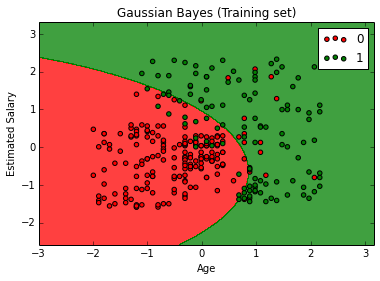

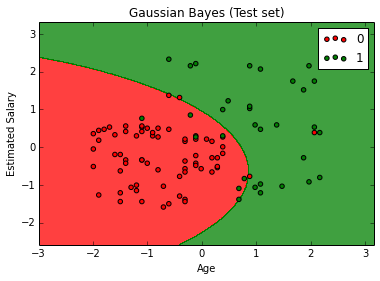

In [20]:
import plot_binary as pb

plt = pb.plot_binary(X_trainS,y_train,classifier)
plt.title('Gaussian Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

plt = pb.plot_binary(X_testS,y_test,classifier)
plt.title('Gaussian Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()